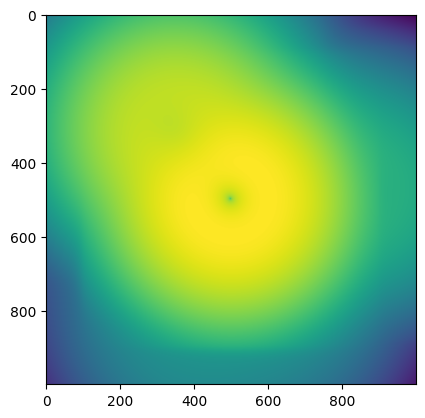

In [66]:
import scipy.ndimage as ndimage
from PIL import Image
from pathlib import Path
import h5py
import numpy as np
path="/home/jyang/data/Flamingo/L0200N0360/halo_particles/"
f=h5py.File(path+'1.hdf5','r')
Coord_g=np.array(f['PartType1']["Coordinates"])
xray_lum=np.array(f['PartType1']['xray_lum_erosita_low'])+np.array(f['PartType1']['xray_lum_erosita_high'])
x_dm=np.array(f['PartType2']["Coordinates"]).T[0]
f.close()
r=np.max(x_dm)

hist2d=np.histogram2d(Coord_g[:,0]/r,Coord_g[:,1]/r,bins=1000,range=[[-1,1],[-1,1]],weights=xray_lum)

img = hist2d[0]
#img_smooth=ndimage.gaussian_gradient_magnitude(img,sigma=1,mode='constant')
#img_smooth+=ndimage.gaussian_gradient_magnitude(img,sigma=2,mode='constant')
#img_smooth+=ndimage.gaussian_gradient_magnitude(img,sigma=8,mode='constant')
#img_smooth+=ndimage.gaussian_gradient_magnitude(img,sigma=32,mode='constant')
img_smooth=ndimage.gaussian_gradient_magnitude(img,sigma=100,mode='constant')
#img_smooth=ndimage.gaussian_filter(img,sigma=32,mode='constant')
import matplotlib.pyplot as plt
plt.imshow(np.log10(img_smooth))

10163
0.2913770370436611


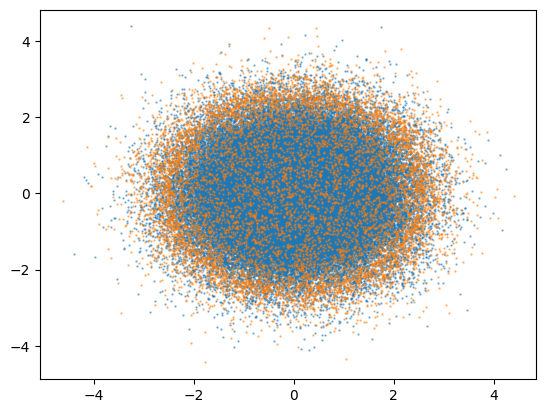

In [26]:
from functions import dissociation,spherical_harmonic_0,spherical_harmonic_1,spherical_harmonic_2,spherical_harmonic__1,spherical_harmonic__2,radial_distance
import numpy as np
import matplotlib.pyplot as plt
#central=np.random.normal(loc=[-1,0,0],scale=0.5,size=(100000,3))
#central[:,0]=central[:,0]*2
#central[:,1]=central[:,1]*2
unbound=np.random.normal(scale=1,size=(100000,3))
unbound[:,2]=unbound[:,2]*2
#unbound[:,1]=unbound[:,1]*2
#satellite=np.random.normal(loc=[1,0,0],scale=0.5,size=(100000,3))
#satellite[:,0]=satellite[:,0]*2
gas=np.random.normal(scale=1,size=(100000,3))

r_g=np.sqrt(gas[:,0]**2+gas[:,1]**2+gas[:,2]**2)
gas=gas[r_g>2.5]
gas[:,2]=gas[:,2]*1
#gas=np.array([[0,0,0],[0,0,0]])
#particles=np.concatenate([central,unbound,satellite],axis=0)
r=np.sqrt(unbound[:,0]**2+unbound[:,1]**2+unbound[:,2]**2)
r_g=np.sqrt(gas[:,0]**2+gas[:,1]**2+gas[:,2]**2)
print(len(gas))
print(dissociation(unbound,gas,rdmg=1))
fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.scatter(unbound[:,0],unbound[:,1],s=0.5,alpha=0.5)
ax.scatter(gas[:,0],gas[:,1],s=0.5,alpha=0.5)



/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_52156/1266666028.py:7: RuntimeWarning: invalid value encountered in divide
  ax.plot(bin,hg/h)


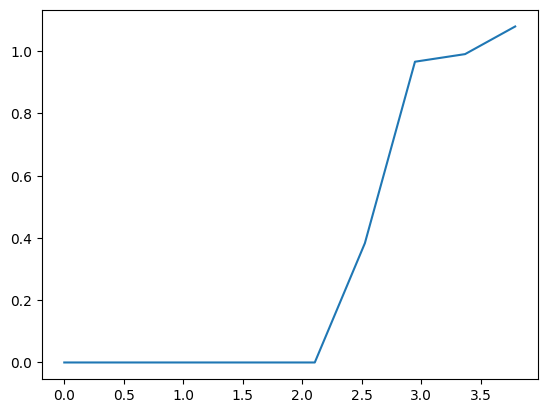

In [19]:
bins=np.linspace(-4,4,20)
bin=0.5*(bins[1:]+bins[:-1])
h=np.histogram(r,bins=np.linspace(-4,4,20))[0]
hg=np.histogram(r_g,bins=np.linspace(-4,4,20))[0]
fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.plot(bin,hg/h)

Text(0.5, 1.0, 'Satellite Mass Function for halos 1<M<5*10^13 Msun')

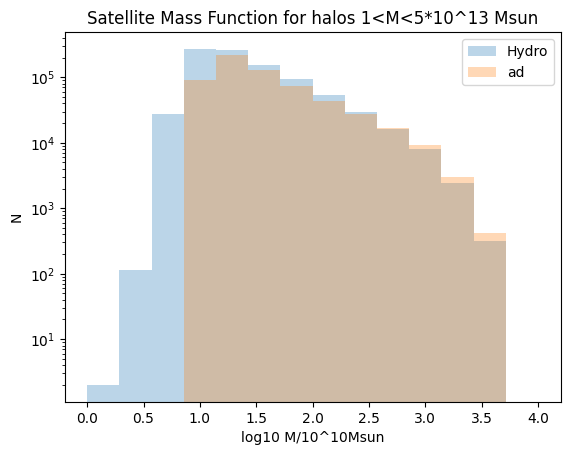

In [50]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
path="/Users/24756376/data/Flamingo/L1000N1800/"

f=h5py.File(path+'halos_13_ranked.hdf5','r')

id=np.array(f['id'])
mass=np.array(f['mass'])[id>0]
f.close()
path="/Users/24756376/data/Flamingo/L1000N1800_NoCool/"
f=h5py.File(path+'halos_13_ranked.hdf5','r')

id_ad=np.array(f['id'])
mass_ad=np.array(f['mass'])[id_ad>0]

#print(np.argwhere(mass>10**4.5)[-1],np.argwhere(mass>10**5)[-1])
#print(np.argwhere(mass_ad>10**4.5)[-1],np.argwhere(mass_ad>10**5)[-1])
f.close()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(np.log10(mass),label="Hydro",alpha=0.3,bins=np.linspace(0,4,15))
ax.hist(np.log10(mass_ad),label="ad",alpha=0.3,bins=np.linspace(0,4,15))
ax.legend()
ax.set_xlabel('log10 M/10^10Msun')
ax.set_ylabel('N')
ax.set_yscale("log")
ax.set_title("Satellite Mass Function for halos 1<M<5*10^13 Msun")